In [25]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Render plots inside the notebook
%matplotlib inline


In [26]:
# Step 2: Load the Excel file and check available sheet names
file_path = "CLASS_2025_07_02.xlsx"

xls = pd.ExcelFile(file_path)
print("Available sheets:", xls.sheet_names)


Available sheets: ['List of economies', 'composition', 'notes']


In [27]:
# Step 3: Load 'List of economies' sheet
df = pd.read_excel(file_path, sheet_name="List of economies")

# Show the first 5 rows and column names
print(df.columns.tolist())
df.head()


['Economy', 'Code', 'Region', 'Income group', 'Lending category']


,Economy,Code,Region,Income group,Lending category
0,Afghanistan,AFG,"Middle East, North Africa, Afghanistan & Pakistan",Low income,IDA
1,Albania,ALB,Europe & Central Asia,Upper middle income,IBRD
2,Algeria,DZA,"Middle East, North Africa, Afghanistan & Pakistan",Upper middle income,IBRD
3,American Samoa,ASM,East Asia & Pacific,High income,NaN
4,Andorra,AND,Europe & Central Asia,High income,NaN


In [28]:
# Step 4: Fill missing values with 'Unknown'
df_clean = df.copy()
df_clean["Region"] = df_clean["Region"].fillna("Unknown")
df_clean["Income group"] = df_clean["Income group"].fillna("Unknown")
df_clean["Lending category"] = df_clean["Lending category"].fillna("Unknown")


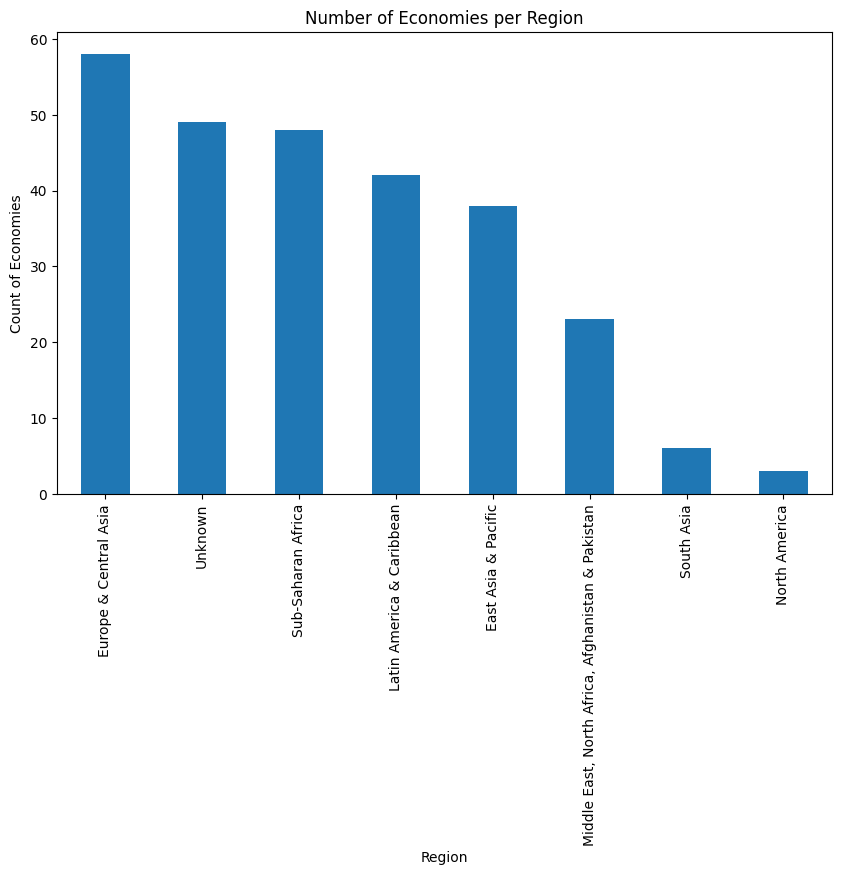

In [29]:
# Step 5a: Region-wise distribution
region_counts = df_clean["Region"].value_counts()

region_counts.plot(kind="bar", figsize=(10,6))
plt.title("Number of Economies per Region")
plt.xlabel("Region")
plt.ylabel("Count of Economies")
plt.show()


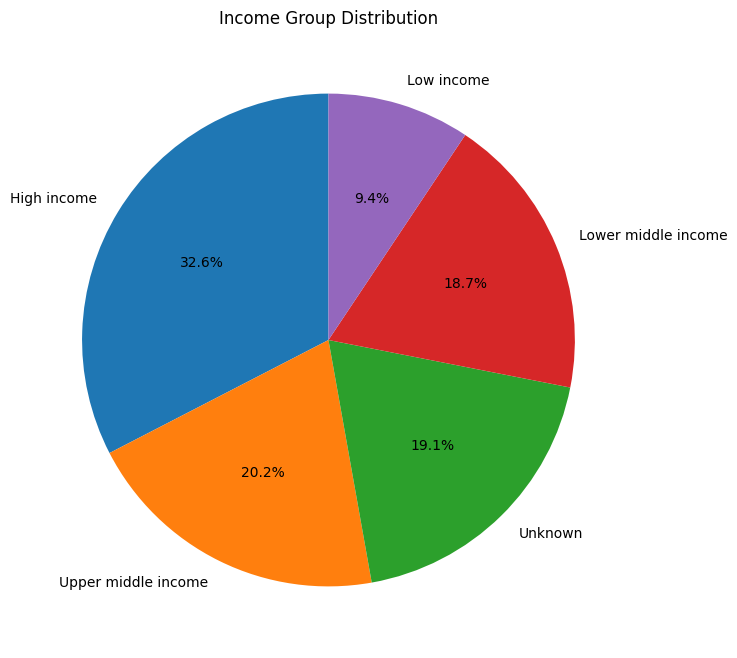

In [30]:
# Step 5b: Income group breakdown
income_counts = df_clean["Income group"].value_counts()

income_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, figsize=(8,8))
plt.title("Income Group Distribution")
plt.ylabel("")  # removes the default ylabel
plt.show()


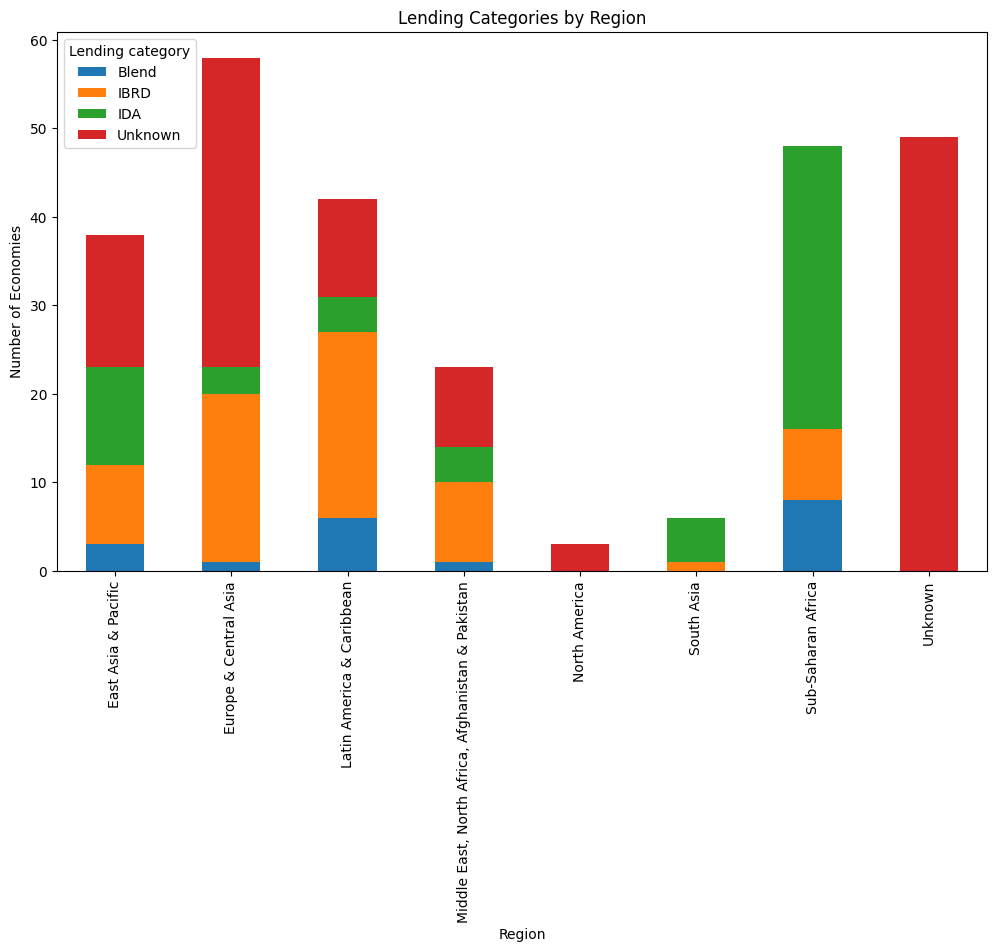

In [31]:
# Step 5c: Region vs Lending category
crosstab = pd.crosstab(df_clean["Region"], df_clean["Lending category"])

crosstab.plot(kind="bar", stacked=True, figsize=(12,7))
plt.title("Lending Categories by Region")
plt.xlabel("Region")
plt.ylabel("Number of Economies")
plt.legend(title="Lending category")
plt.show()


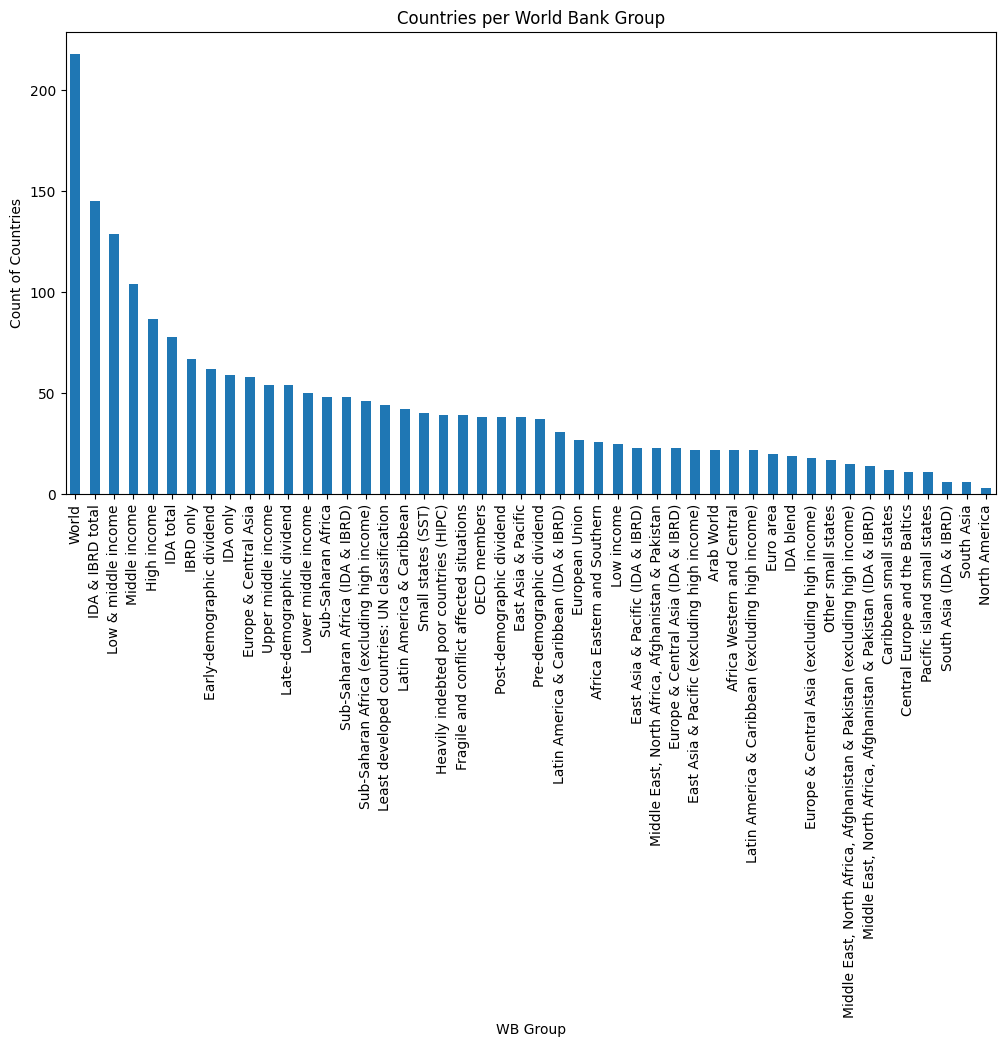

In [32]:
# Step 6: Load composition sheet
comp = pd.read_excel(file_path, sheet_name="composition")

# Count countries per group
group_counts = comp["WB_Group_Name"].value_counts()

group_counts.plot(kind="bar", figsize=(12,6))
plt.title("Countries per World Bank Group")
plt.xlabel("WB Group")
plt.ylabel("Count of Countries")
plt.show()


In [33]:
# Step 7: Load notes sheet (just text info)
notes = pd.read_excel(file_path, sheet_name="notes")
notes.head(10)


,Notes
0,This table classifies all World Bank member co...
1,NaN
2,IDA countries are those that lack the financia...
3,NaN
4,"Notes: The term country, used interchangeably ..."


In [36]:
# Install python-pptx if not already installed
# !pip install python-pptx

import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches

# --------- STEP 1: Re-generate & save charts as images ---------

# Chart 1: Number of economies per region
region_counts = series["Region"].value_counts()
plt.figure(figsize=(8,6))
region_counts.plot(kind="bar")
plt.title("Number of Economies per Region")
plt.ylabel("Number of Economies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("chart_region.png")
plt.close()

# Chart 2: Number of economies per income group
income_counts = series["Income group"].value_counts()
plt.figure(figsize=(6,6))
income_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Economies by Income Group")
plt.ylabel("")
plt.tight_layout()
plt.savefig("chart_income.png")
plt.close()

# Chart 3: Distribution of lending categories
lending_counts = series["Lending category"].value_counts()
plt.figure(figsize=(8,6))
lending_counts.plot(kind="bar", color="orange")
plt.title("Economies by Lending Category")
plt.ylabel("Number of Economies")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("chart_lending.png")
plt.close()

# Chart 4: Grouping by Region and Income Group
region_income = series.groupby(["Region", "Income group"]).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
region_income.plot(kind="bar", stacked=True)
plt.title("Economies by Region and Income Group")
plt.ylabel("Number of Economies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("chart_region_income.png")
plt.close()

# --------- STEP 2: Create PowerPoint ---------
prs = Presentation()

# Function to add slide with title + image
def add_slide(title, image_path):
    slide_layout = prs.slide_layouts[5]  # blank layout
    slide = prs.slides.add_slide(slide_layout)
    txBox = slide.shapes.add_textbox(Inches(1), Inches(0.5), Inches(8), Inches(1))
    tf = txBox.text_frame
    tf.text = title
    slide.shapes.add_picture(image_path, Inches(1), Inches(1.5), Inches(7), Inches(4))

# Add each chart as a slide
add_slide("Number of Economies per Region", "chart_region.png")
add_slide("Economies by Income Group", "chart_income.png")
add_slide("Economies by Lending Category", "chart_lending.png")
add_slide("Economies by Region and Income Group", "chart_region_income.png")

# Save PowerPoint
prs.save("WorldBankAnalysis.pptx")

print("✅ PowerPoint created: World_Bank_Analysis.pptx")


✅ PowerPoint created: World_Bank_Analysis.pptx


<Figure size 1000x600 with 0 Axes>